In [6]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns
from matplotlib import pyplot as plt
from implementations import *
from GAN_function import *

#to access our implemented ML functions
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
data_path=data_file(20.0)

In [8]:
data = clean_df(build_df(data_path))

In [9]:
table_of_p = proba_table(data)

Finished     1000 out of     1000 100.00 % with 0 in queueee
Finished with     1000 primaries and a total of     1158 particles


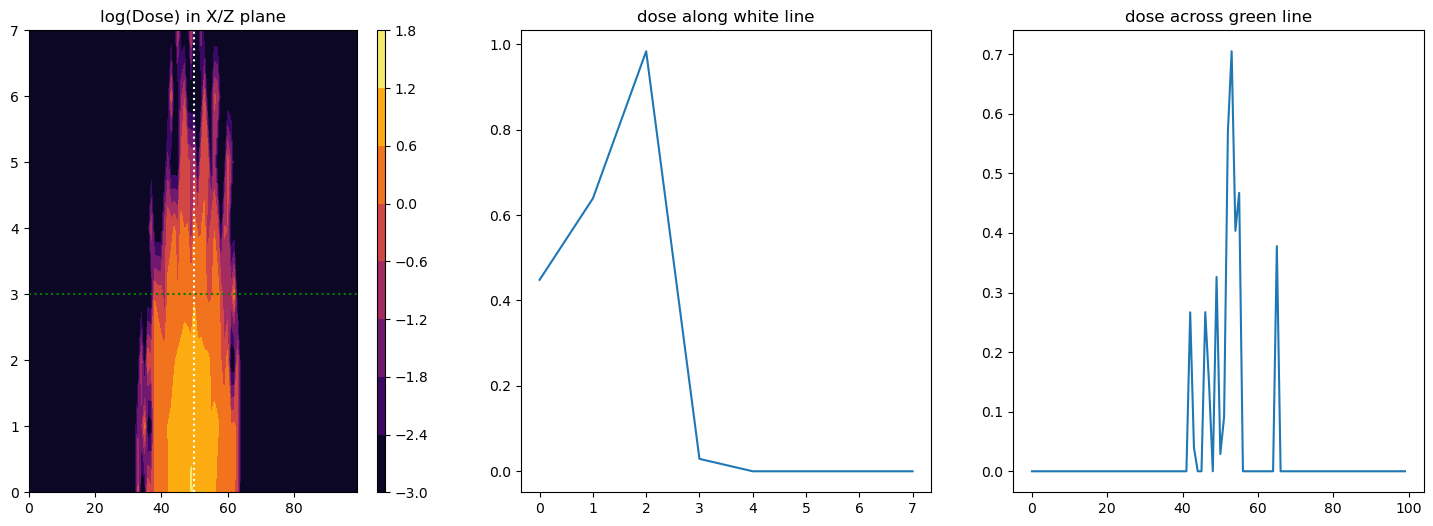

In [25]:
WX,WY,WZ = 16,200,200 # 300x200x200 mm
NX,NY,NZ = 8,100,100 # for 2x2x2 mm voxels
A = Arena(WX, WY, WZ, NX, NY, NZ)
NMC = 1000 # number of particles we want to simulate
EMAX = 0.3 # maximum energy of particles

ToSimulate = queue.Queue() # the queue of particles
for i in range(NMC) :
    # create NMC particles at x=0, y=WY/2, z=WZ/2, going in the X direction (1,0,0) and with a gamma distributed energy
    s = random.gauss(0.0, 0.1)
    ypos = (1+s)*WY/2
    ydir = 0.2*s
    s = random.gauss(0.0, 0.1)
    zpos = (1+s)*WZ/2
    zdir = 0.2*s
    xdir = math.sqrt(1 - ydir**2 - zdir**2)
    e = np.clip(EMAX*random.gammavariate(2.0, 0.667),0,20)
    P = Particle(0.0, ypos, zpos, xdir, ydir, zdir, e, Type.electron, True)
    ToSimulate.put(P)

DONE = 0 # count number of primary particles
NALL = 0 # count total number of particles
while not ToSimulate.empty() > 0 :
    P = ToSimulate.get()
    if P.is_primary :
        DONE += 1
    NALL += 1
    while P.ene > 0.0 :
        distance, delta_e, cos_theta, generated_particle = GetEvent(P,table_of_p)
        P.Move(distance)
        P.Lose(delta_e, A)
        P.Rotate(cos_theta)
        if generated_particle is not None :
            ToSimulate.put(generated_particle)
    if NALL % 1000 :
        sys.stdout.write(f"Finished {DONE:8} out of {NMC:8} {(100.0*DONE)/NMC:.2f} % with {ToSimulate.qsize()} in queue\r"); sys.stdout.flush()
sys.stdout.write(f"\nFinished with {NMC:8} primaries and a total of {NALL:8} particles\n"); sys.stdout.flush()

fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
CNTR = axes[0].contourf( np.log10(A.M.sum(axis=1)+0.001), cmap="inferno" )
axes[0].axvline(NY/2, ls=":", color="white")
axes[0].axhline(3, ls=":", color="green")
plt.colorbar(CNTR, aspect=60)
axes[0].set_title("log(Dose) in X/Z plane")
axes[1].plot( A.M[:,int(NY/2),int(NZ/2)] )
axes[1].set_title("dose along white line")
axes[2].plot( A.M[3,:,int(NZ/2)] )
axes[2].set_title("dose across green line")
plt.show()

      

In [24]:
WX,WY,WZ = 120,200,200 # 300x200x200 mm
NX,NY,NZ = 60,100,100 # for 2x2x2 mm voxels
A = Arena(WX, WY, WZ, NX, NY, NZ)
NMC = 1000 # number of particles we want to simulate
EMAX = 20.0 # maximum energy of particles

ToSimulate = queue.Queue() # the queue of particles
for i in range(NMC) :
    # create NMC particles at x=0, y=WY/2, z=WZ/2, going in the X direction (1,0,0) and with a gamma distributed energy
    s = random.gauss(0.0, 0.1)
    ypos = (1+s)*WY/2
    ydir = 0.2*s
    s = random.gauss(0.0, 0.1)
    zpos = (1+s)*WZ/2
    zdir = 0.2*s
    xdir = math.sqrt(1 - ydir**2 - zdir**2)
    e = np.clip(EMAX*random.gammavariate(2.0, 0.667),0,20)
    P = Particle(0.0, ypos, zpos, xdir, ydir, zdir, e, Type.electron, True)
    ToSimulate.put(P)

DONE = 0 # count number of primary particles
NALL = 0 # count total number of particles
while not ToSimulate.empty() > 0 :
    P = ToSimulate.get()
    if P.is_primary :
        DONE += 1
    NALL += 1
    while P.ene > 0.0 :
        distance, delta_e, cos_theta, generated_particle = GetEvent(P,table_of_p)
        P.Move(distance)
        P.Lose(delta_e, A)
        P.Rotate(cos_theta)
        #if generated_particle is not None :
            #ToSimulate.put(generated_particle)
    if NALL % 1000 :
        sys.stdout.write(f"Finished {DONE:8} out of {NMC:8} {(100.0*DONE)/NMC:.2f} % with {ToSimulate.qsize()} in queue \r"); sys.stdout.flush()
sys.stdout.write(f"\nFinished with {NMC:8} primaries and a total of {NALL:8} particles\n"); sys.stdout.flush()


Finished      999 out of     1000 99.90 % with 1 in queue   
Finished with     1000 primaries and a total of     1000 particles


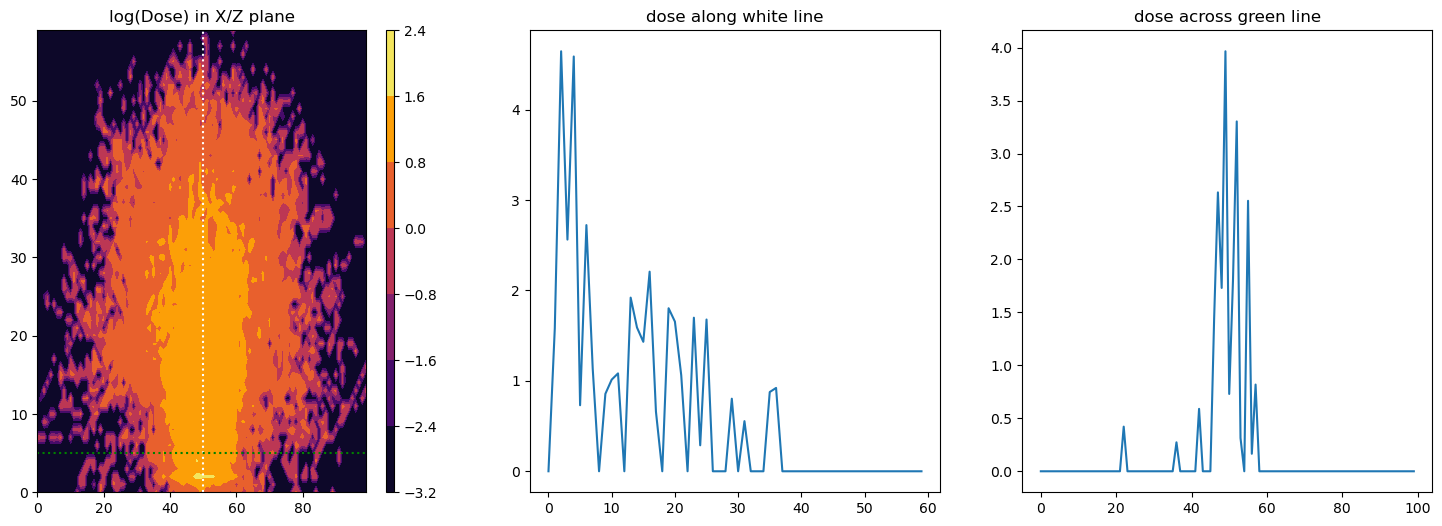

In [22]:

fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
CNTR = axes[0].contourf( np.log10(A.M.sum(axis=1)+0.001), cmap="inferno" )
axes[0].axvline(NY/2, ls=":", color="white")
axes[0].axhline(5, ls=":", color="green")
plt.colorbar(CNTR, aspect=60)
axes[0].set_title("log(Dose) in X/Z plane")
axes[1].plot( A.M[:,int(NY/2),int(NZ/2)] )
axes[1].set_title("dose along white line")
axes[2].plot( A.M[5,:,int(NZ/2)] )
axes[2].set_title("dose across green line")
plt.show()